In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\User\Desktop\Hotel Booking\Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Data Cleaning

Q1: Finding null values and dealing with them

In [5]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [6]:
df['children'].fillna(0, inplace = True)
df['country'] = df['country'].ffill()
df['agent'].fillna(value = df['agent'].mode(), inplace = True)
df['company'].fillna(value = df['company'].mode(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

C:\Users\User\AppData\Local\Temp\ipykernel_2532\922023817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_2532\922023817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

Q2:Fixing types

In [7]:
df['is_canceled'] = df['is_canceled'].astype(bool)
df['children'] = df['children'].astype(int)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

Q3:Getting rid of duplicates

In [8]:
df.drop_duplicates(inplace=True)

Analysis

Q1:Number of each hotels

In [13]:
df['hotel'].count()

87381

In [16]:
hotel_count = df['hotel'].value_counts()

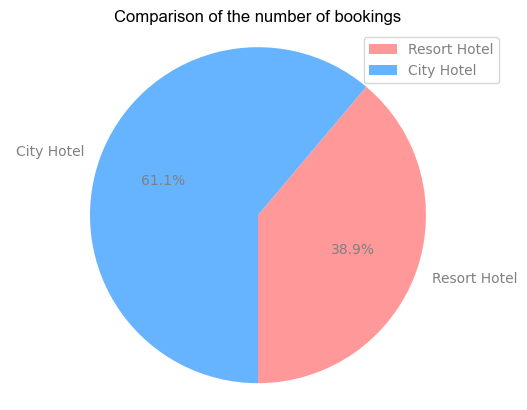

In [17]:
labels = ['Resort Hotel', 'City Hotel']
sizes = [33952, 53429]  
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=270, colors = colors)
plt.axis('equal')  
plt.title('Comparison of the number of bookings', color = 'black',fontname = 'Arial')
plt.rcParams['font.size'] = 10
plt.rcParams['text.color'] = 'gray'
plt.legend()
plt.show()

There are more city hotels with 61 percentage

In [18]:
hotel_count.idxmax()

'City Hotel'

Q2:

In [21]:
canceled = df['is_canceled'].sum()
cancelation_per = canceled / df['is_canceled'].count() * 100
cancelation_per.round().astype(int)

27

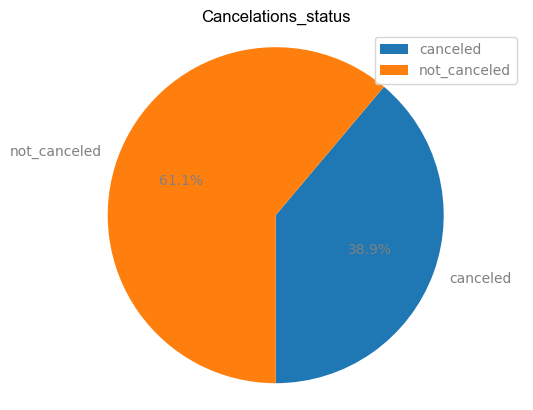

In [22]:
labels = ['canceled', 'not_canceled']
sizez = [cancelation_per, 100 - cancelation_per]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=270)
plt.axis('equal')  
plt.title('Cancelations_status', color = 'black',fontname = 'Arial')
plt.rcParams['font.size'] = 10
plt.rcParams['text.color'] = 'gray'
plt.legend()
plt.show()

Q3:Based on different hotel types, what percentage of bookings were cancelled?

In [23]:
df.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    False          37379
              True           16050
Resort Hotel  False          25976
              True            7976
Name: count, dtype: int64

even though city hotel was booked more it also had the most cancelatuon but still was more popular than the resort hotel

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


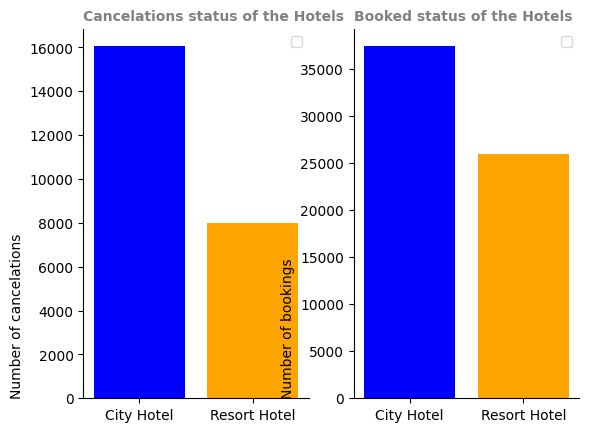

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data1 = [16050, 7976]
data2 = [37379, 25976]
cancel = ax1.bar(['City Hotel', 'Resort Hotel'], data1, color = ["blue", "orange"])
ax1.set_title(
    "Cancelations status of the Hotels",
    weight="bold",
    color="gray",
    fontsize=10,
    loc="left",
)
not_cancel = ax2.bar(['City Hotel', 'Resort Hotel'], data2, color = ["blue", "orange"])
ax2.set_title(
    "Booked status of the Hotels",
    weight="bold",
    color="gray",
    fontsize=10,
    loc="left",
)
ax1.set_ylabel(
    "Number of cancelations",
    loc = "bottom"
)
ax2.set_ylabel(
    "Number of bookings",
    loc = "bottom"
)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.legend()
ax2.legend()

plt.show()

Q4:In different years, what type of hotels were booked most and booked least?

In [45]:
year_hotel = df.groupby('arrival_date_year')['hotel'].value_counts().reset_index()
year_hotel

,arrival_date_year,hotel,count
0,2015,Resort Hotel,6761
1,2015,City Hotel,6550
2,2016,City Hotel,26760
3,2016,Resort Hotel,15625
4,2017,City Hotel,20119
5,2017,Resort Hotel,11566


except for 2015 city hotel has more bookings and 2016 was these 2 hotels busiest year the number of booking almost doubled from last year.

<Axes: xlabel='arrival_date_year', ylabel='count'>

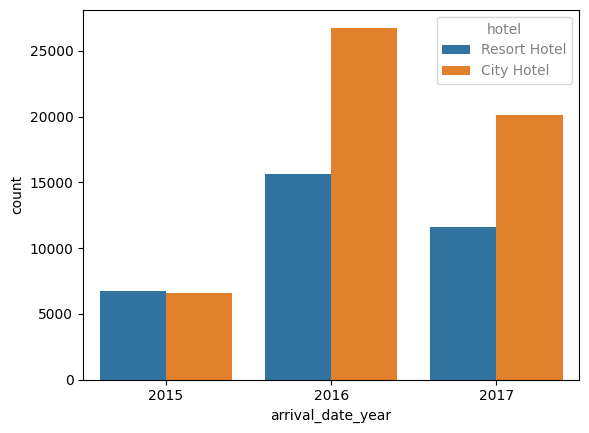

In [55]:
import seaborn as sns
sns.barplot(x="arrival_date_year", y="count", hue = "hotel", data=year_hotel)

Q5:According to different hotel types, how ‘adr’ changes in different month?

adr : Average daily rate

In [57]:
hotel_adr = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
hotel_adr

,hotel,arrival_date_month,adr
0,City Hotel,April,117.156250
1,City Hotel,August,124.901601
2,City Hotel,December,92.686587
3,City Hotel,February,88.945304
4,City Hotel,January,85.092612
5,City Hotel,July,120.055385
6,City Hotel,June,123.836342
7,City Hotel,March,94.763375
8,City Hotel,May,127.851240
9,City Hotel,November,89.454120


Highest daily average rate in both hotels have happened in summer(June, July, August)

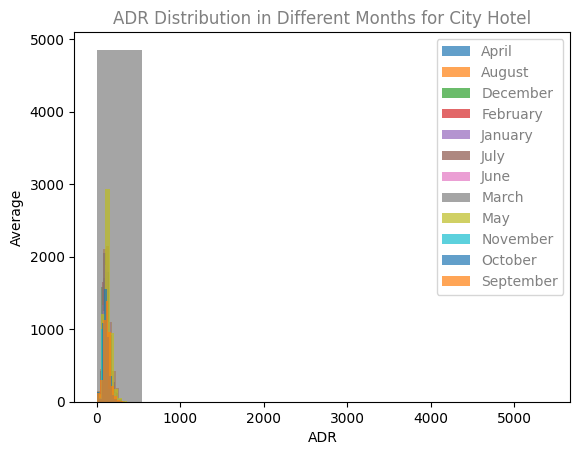

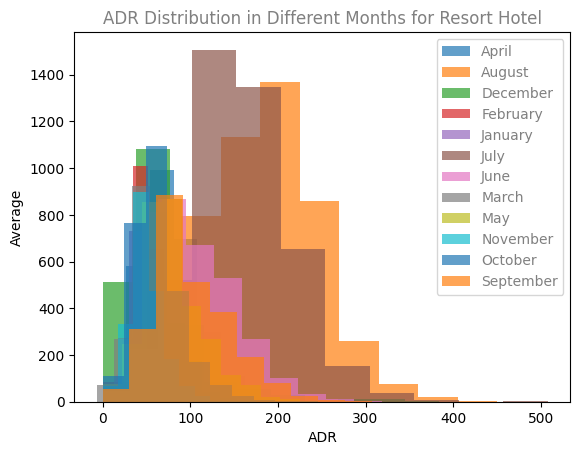

In [65]:
for hotel, group in df.groupby('hotel'):
    for month, subset in group.groupby('arrival_date_month'):
        plt.hist(subset['adr'], bins=10, alpha=0.7, label=month)

    plt.xlabel('ADR')
    plt.ylabel('Average')
    plt.title(f'ADR Distribution in Different Months for {hotel}')
    plt.legend()
    plt.show()

Q6:Check hotel wise daily rates mean, standard deviation, median, min and max.

In [66]:
df.groupby('hotel')['adr'].mean()

hotel
City Hotel      110.983867
Resort Hotel     99.037750
Name: adr, dtype: float64

In [67]:
df.groupby('hotel')['adr'].std()

hotel
City Hotel      48.064466
Resort Hotel    63.752377
Name: adr, dtype: float64

In [68]:
df.groupby('hotel')['adr'].min()

hotel
City Hotel      0.00
Resort Hotel   -6.38
Name: adr, dtype: float64

In [69]:
df.groupby('hotel')['adr'].max()

hotel
City Hotel      5400.0
Resort Hotel     508.0
Name: adr, dtype: float64

In [70]:
df.groupby('hotel')['adr'].median()

hotel
City Hotel      105.3
Resort Hotel     79.5
Name: adr, dtype: float64

Q7:Extract the number of bookings per country and investigate that most of the guests are from which countries?

In [80]:
hotel_country = df.groupby('country')['hotel'].count().reset_index(name = 'hotel_country')
hotel_country

,country,hotel_country
0,ABW,2
1,AGO,343
2,AIA,1
3,ALB,11
4,AND,7
...,...,...
172,VGB,1
173,VNM,8
174,ZAF,78
175,ZMB,2


In [82]:
hotel_country[hotel_country['hotel_country'] == hotel_country['hotel_country'].max()]

,country,hotel_country
135,PRT,27818


OR

In [86]:
max_country_rows = hotel_country.loc[hotel_country['hotel_country'].idxmax()]
max_country_rows

country            PRT
hotel_country    27818
Name: 135, dtype: object

Most guests are from Portugal countary

Q8:According to the ‘market_segment’ most of the guests book their rooms on what channels.

In [71]:
df.groupby(['hotel', 'market_segment']).size().reset_index(name = 'number_of_market_segment')

,hotel,market_segment,number_of_market_segment
0,City Hotel,Aviation,227
1,City Hotel,Complementary,514
2,City Hotel,Corporate,2227
3,City Hotel,Direct,5559
4,City Hotel,Groups,2635
5,City Hotel,Offline TA/TO,7271
6,City Hotel,Online TA,34994
7,City Hotel,Undefined,2
8,Resort Hotel,Complementary,189
9,Resort Hotel,Corporate,1982


For both hotels Online TA has been used the most and Complementary  has been used the least